Ce cahier numérique est à disposition sous licence CC-BY-NC-SA. Il a été écrit par Martin Vérot pour les étudiants en L3 de l'ENS de Lyon au sein du département Sciences de la matière. Cette activité vient en complément du [polycopié de cours](http://agregationchimie.free.fr/cours.php#incertitudes). 

# t-test : accord entre une série de mesure et une valeur de référence

Par exemple, si avec une balance on mesure la masse d'un poids étalon de 100 g et on cherche à vérifier que le poids donné est correct. On trouve comme résultats à partir de 7 mesures : $[90,1; 98,2; 105,1; 92,4; 93,6; 94,4; 90,1]$.


## Méthode manuelle

* $z_0$ est la valeur de référence
* $zs$ correspond aux mesures effectuées
* $seuil$ est la valeur critique choisie pour trancher s'il y a égalité ou non

In [1]:
import numpy as np
from scipy.stats import t
#valeur théorique
z0 = 100
#valeurs
zs = np.array([90.1,98.2,105.1,92.4,93.6,94.4,90.1])
#seuil !!! ce choix est arbitraire, il est couramment pris égal à 0.05 
#mais ce seuil n'a pas de signification intrinsèque.
seuil = 0.95


#étape 1 : calcul de la moyenne et de l'écart-type sur la moyenne
n = zs.size #nombre de degrés de liberté 
z_moy = np.average(zs)
sigma_zs = np.std(zs,ddof=1)
sigma_z_moy = sigma_zs/np.sqrt(n)
#étape 2 : calcul de la valeur de t_exp
t_exp = np.abs(z_moy-z0)/sigma_z_moy

#étape 3 : calcul de la valeur de référence à l'aide de la distribution de student pour le seuil choisi
t_theo = t.interval(seuil,n-1)[1]

print('z_moy {:.3f}, écart-type sur la moyenne {:.3f}'.format(z_moy,sigma_z_moy))
print('t_exp {}, t_theo {}'.format(t_exp,t_theo))
#étape 4 : comparaison des deux valeurs
if t_exp>t_theo:
    print('À priori, les deux valeurs ne concordent pas.')
else:
    print('À priori, les deux valeurs concordent.')

z_moy 94.843, écart-type sur la moyenne 2.007
t_exp 2.5695848557985186, t_theo 2.4469118487916806
À priori, les deux valeurs ne concordent pas.


l'hypothèse nulle est fausse, la masse indiquée par la balance ne correspond pas à la valeur attendue (la balance peut être fausse, ou ... le poids peut ne pas faire 100 g!).

## Visualisation du résultat

Pour que le test soit vérifié, il faudrait que la valeur théorique symbolisée par une barre rouge soit à l'intérieur de l'intervalle donné par la barre bleue. Si ce n'est pas le cas, alors il n'y a pas égalité.

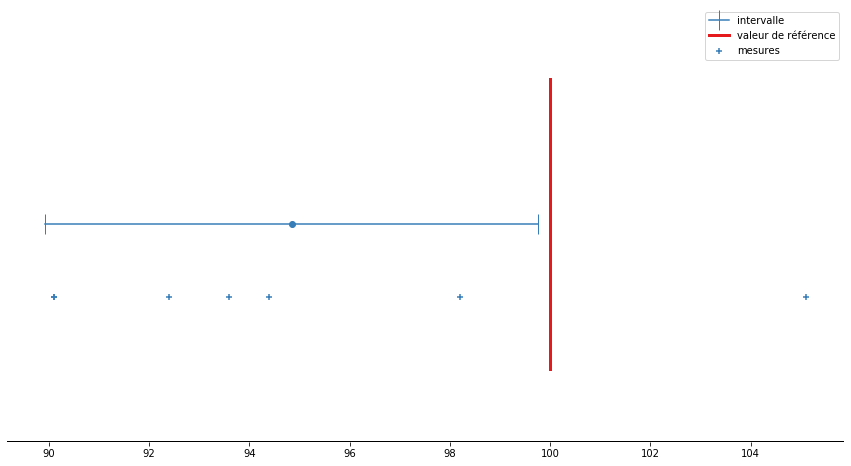

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(1, 1,hspace=0.25)
ax1 = fig.add_subplot(gs[0,0])
#tracé des valeurs trouvées
ax1.scatter(zs,np.ones(zs.size)*1,marker='+',label='mesures',color='#377eb8')

#tracé de la moyenne expérimentale
ax1.plot([z_moy],[1.05],marker='o',color='#377eb8',lw=3)
ax1.plot([z_moy-t_theo*sigma_z_moy,z_moy+t_theo*sigma_z_moy],1.05*np.ones(2),marker='|',ms=20,label='intervalle',color='#377eb8')

#tracé de la moyenne théorique
ax1.plot(z0*np.ones(2),[0.95,1.15],label='valeur de référence',color='#e41a1c',lw=3)

#Option pour rendre le graphique plus simple
ax1.set_frame_on(False)
ax1.set_ylim(0.9,1.2)
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(True)
xmin, xmax = ax1.get_xaxis().get_view_interval()
ymin, ymax = ax1.get_yaxis().get_view_interval()
ax1.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))
plt.legend()
plt.show()

## Méthode automatique

Ici, la méthode est appliquée pas à pas tel que décrite dans le polycopié, mais il est possible d'aller plus vite avec des fonctions pré-construites

In [3]:
import scipy
import scipy.stats
val,p = scipy.stats.ttest_1samp(zs, z0)
#valeur de t_exp
print('t_exp {}'.format(np.abs(val)))
#probabilité d'affirmer par erreur qu'il n'y a pas égalité entre les valeurs mesurées et la valeur théorique
print('p {}'.format(p) )  
if 1-p>seuil:
    print('À priori, les deux valeurs ne concordent pas.')
else:
    print('À priori, les deux valeurs concordent.')

print('seuil critique qui changera la conclusion du test : {:.3f}'.format(1-p))


t_exp 2.5695848557985186
p 0.0423586592008936
À priori, les deux valeurs ne concordent pas.
seuil critique qui changera la conclusion du test : 0.958


Il est possible de trouver la valeur de p calculée par python pour la méthode manuelle avec le code suivant (aux erreurs numériques près) :

In [4]:
def FindP(seuil,n,t_exp):    
    return t.interval(seuil,n-1)[1]-t_exp
#recherche du seuil pour lequel la distribution de student est égale à la valeur t_exp    
p_manuel =1-scipy.optimize.brentq(FindP,0,1,args = (n,t_exp))

#écart entre la valeur donnée par la fonction scipy.stats.ttest_1samp et la valeur calculée par recherche de zéro
print('p {} écart {}'.format(p_manuel,p-p_manuel))



p 0.042358658944138705 écart 2.5675489512266836e-10
